# Federico Campanozzi - Progetto Data Intensive con Relazione
                                                                                                             a.a. 2021/2022

## 1 - Descrizione del problema

## 2- Analisi esplorativa

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
transactions = pd.read_csv("../data/data.csv")
transactions[:10]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [38]:
vMtx = transactions.describe().values
vMtx = np.vstack([vMtx, [len(transactions[c].unique()) for c in ["step","amount","oldbalanceOrg",
                                                                 "newbalanceOrig","oldbalanceDest","newbalanceDest",
                                                                 "isFraud","isFlaggedFraud"]]])
vMtx = np.vstack([vMtx, transactions.describe().isna().sum().values])
pd.DataFrame(data=vMtx,
             index=['count','mean','std','min','25%','50%','75%','max','valori distinti','valori nulli'],
             columns=transactions.describe().columns)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00
valori distinti,7.430000e+02,5.316900e+06,1.845844e+06,2.682586e+06,3.614697e+06,3.555499e+06,2.000000e+00,2.000000e+00
valori nulli,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


### 2.1 - Grafici

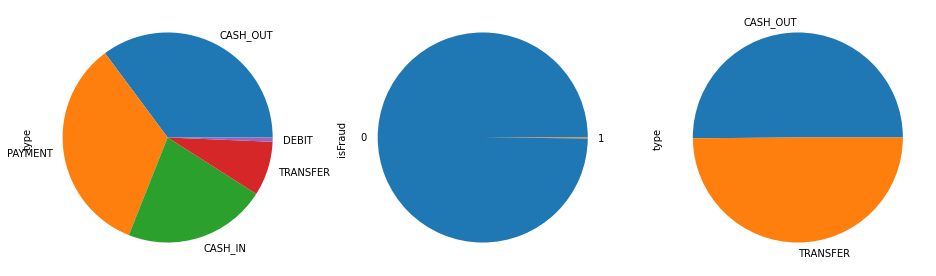

In [39]:
plt.figure(figsize=(16, 10))
transactions["type"].value_counts().plot.pie(ax=plt.subplot(1, 3, 1));
transactions["isFraud"].value_counts().plot.pie(ax=plt.subplot(1, 3, 2));
transactions[transactions["isFraud"] == 1]["type"].value_counts().plot.pie(ax=plt.subplot(1, 3,3));

In [40]:
feature_list = ["type","amount","oldbalanceOrg","newbalanceOrig"]
feature_numeric = ["amount","oldbalanceOrg","newbalanceOrig"]
feature_categorical = ["type"]

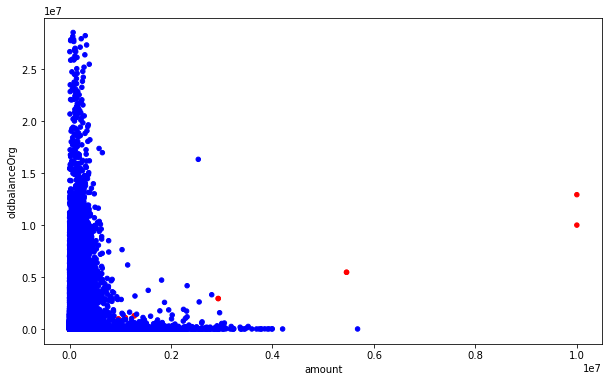

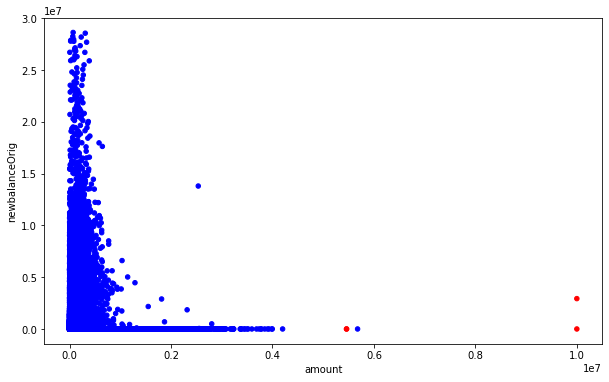

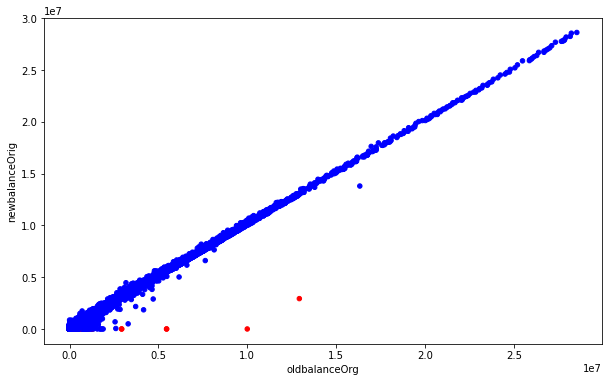

In [41]:
transactions = pd.read_csv("../data/data.csv", nrows=40_000)
tfraut_colors = transactions["isFraud"].map({0: "blue", 1: "red"})
for f_i in range(1,len(feature_list)):
    for f_j in range(f_i + 1, len(feature_list)) :        
        transactions.plot.scatter(feature_list[f_i], feature_list[f_j], c=tfraut_colors, figsize=(10, 6));

## 3 - Normalizzazione dei dati

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

X = transactions[feature_list]
y = transactions[["isFraud"]]

X_train, x_val, y_train, y_val = train_test_split(X, y, test_size=1/3, random_state=42)

preproc = ColumnTransformer(
    [
        ("numeric",StandardScaler(),feature_numeric),
        ("categorical",OneHotEncoder(),feature_categorical)
    ],remainder="drop")

X_sample = transactions[feature_numeric + feature_categorical]
preproc.fit_transform(X_sample)
pd.DataFrame(
    preproc.transform(X_sample),
    columns = feature_numeric + list(preproc.named_transformers_["categorical"].get_feature_names())
).head(10)

,amount,oldbalanceOrg,newbalanceOrig,x0_CASH_IN,x0_CASH_OUT,x0_DEBIT,x0_PAYMENT,x0_TRANSFER
0,-0.439241,-0.266896,-0.273043,0.0,0.0,0.0,1.0,0.0
1,-0.464742,-0.331287,-0.333001,0.0,0.0,0.0,1.0,0.0
2,-0.470125,-0.340399,-0.341250,0.0,0.0,0.0,0.0,1.0
3,-0.470125,-0.340399,-0.341250,0.0,1.0,0.0,0.0,0.0
4,-0.433394,-0.322506,-0.328533,0.0,0.0,0.0,1.0,0.0
5,-0.445706,-0.317184,-0.321659,0.0,0.0,0.0,1.0,0.0
6,-0.447976,-0.261248,-0.266324,0.0,0.0,0.0,1.0,0.0
7,-0.445566,-0.264322,-0.269670,0.0,0.0,0.0,1.0,0.0
8,-0.457835,-0.339322,-0.341250,0.0,0.0,0.0,1.0,0.0
9,-0.453636,-0.322434,-0.325769,0.0,0.0,1.0,0.0,0.0


### 3.1 - PCA

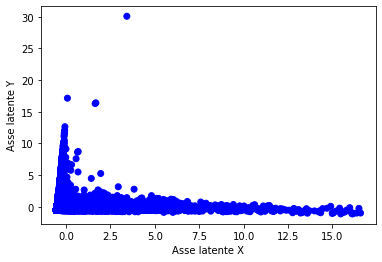

In [43]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

c_map = transactions[:X_train.values.shape[0]]["isFraud"].map({0: "blue", 1: "red"})
x_preproc = pca.fit_transform(preproc.fit_transform(X_train))

plt.scatter(x_preproc[:,0], x_preproc[:,1], c=c_map)
plt.xlabel('Asse latente X')
plt.ylabel('Asse latente Y')
plt.show()

## 4 - Modelli Predittivi

In [44]:
from sklearn.pipeline import Pipeline
transactions = pd.read_csv("../data/data.csv", nrows=20_000)

Funzioni di base per il calcolo delle accuratezze

In [66]:
from sklearn.metrics import precision_score, recall_score, f1_score, r2_score, confusion_matrix, mean_squared_error

def print_matrix(classes, matrix, pad = 10):
    for i in range(len(classes)):
        if i == 0 : 
            for c in ([" "] + classes):
                print(f"{c.rjust(pad, ' ')}",end=' ')
            print()
        for j in range(len(classes)):
            if (j == 0) : 
                print(f"{classes[i].rjust(pad, ' ')}",end=' ')
            print(f"{str(matrix[i][j]).rjust(pad, ' ')}",end=' ')
        print()
    return None

def rmspe(y_real, y_pred):
    '''ROOT MEAN SQUARE PERTANGE ERROR'''
    return np.sqrt(np.mean((y_pred /y_real - 1) ** 2))

def print_eval_regressor(X, y, model):
    '''print eval for regression model'''
    y_pred = model.predict(X)
    print(f"MSE       : {mean_squared_error(y, y_pred):12.4f}")    
    print(f"RMSPE     : {rmspe(y.values, y_pred):12.4f}")
    print_eval_base(X, y, model)
    return None

def print_eval_classify(X, y, model, classes):
    '''print eval for classification model'''
    y_pred = model.predict(X)    
    cm = confusion_matrix(y, y_pred)
    print("Confusion Matrix : ")
    print_matrix(classes, cm)
    print(f"\nPRECISION  : {precision_score(y, y_pred):12.4f}")
    print(f"RECALL     : {recall_score(y, y_pred):12.4f}")
    print(f"F1-MEASURE : {f1_score(y, y_pred, average='macro'):12.4f}")
    print_eval_base(X, y, model)
    return None

def print_eval_base(X, y, model):
    '''print eval for all model, only R^2 score '''
    y_pred = model.predict(X)
    print(f"R^2 : {r2_score(y, y_pred):12.4f}")
    return None

## 4.1 - Modelli di Regressione 

### 4.1.1 - Ridle Regression

In [51]:
from sklearn.linear_model import Ridge

model = Pipeline([
    ("preproc", preproc),
    ("regRidge", Ridge(alpha=1))
])

model.fit(X_train, y_train)
print_eval_regressor(x_val, y_val, model)

MSE       :       0.0027
RMSPE     :          inf
R^2 =       0.0174


C:\Users\Federico\AppData\Local\Temp/ipykernel_296/2357500274.py:18: RuntimeWarning: divide by zero encountered in true_divide
  return np.sqrt(np.mean((y_pred /y_real - 1) ** 2))


## 4.2 Alberi di Regressione

### 4.2.1 - XGBRegressor

In [52]:
from xgboost import XGBRegressor

xgbm = XGBRegressor(objective='reg:squarederror', 
                    learning_rate = 0.01577, 
                    reg_lambda=0.008, 
                    reg_alpha=0.0001, 
                    n_estimators=1025, 
                    verbose_eval=False)
model = Pipeline([
    ("preproc", preproc),
    ("XGBRegressor", xgbm)
])
model.fit(X_train, y_train)
print_eval_regressor(x_val, y_val, model)

[22:15:32] WARNING: ..\src\learner.cc:576: 
Parameters: { "verbose_eval" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


MSE       :       0.0020


C:\Users\Federico\AppData\Local\Temp/ipykernel_296/2357500274.py:18: RuntimeWarning: divide by zero encountered in true_divide
  return np.sqrt(np.mean((y_pred /y_real - 1) ** 2))


RMSPE     :          inf
R^2 =       0.2721


### 4.2.2 - Lightgbm (Random Forest)

In [53]:
from lightgbm import LGBMRegressor

model = Pipeline([
    ("preproc",preproc),
    ("LGBM", LGBMRegressor(boosting_type='rf',n_estimators=1000,max_depth=-1,bagging_freq =10,bagging_fraction=0.95))
])

model.fit(X_train, y_train)
print_eval_regressor(x_val, y_val, model)

C:\Users\Federico\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[LightGBM] [Warning] bagging_fraction is set=0.95, subsample=1.0 will be ignored. Current value: bagging_fraction=0.95
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
MSE       :       0.0022


C:\Users\Federico\AppData\Local\Temp/ipykernel_296/2357500274.py:18: RuntimeWarning: divide by zero encountered in true_divide
  return np.sqrt(np.mean((y_pred /y_real - 1) ** 2))


RMSPE     :          inf
R^2 =       0.2009


### 4.3.3 - Catboost

In [54]:
from catboost import CatBoostRegressor

model = Pipeline([
    ("preproc", preproc),
    ("CATBOOST", CatBoostRegressor(n_estimators=91))
])

model.fit(X_train, y_train);
print_eval_regressor(x_val, y_val, model)

Learning rate set to 0.432862
0:	learn: 0.0426549	total: 59ms	remaining: 5.31s
1:	learn: 0.0413614	total: 63.9ms	remaining: 2.84s
2:	learn: 0.0408786	total: 68.6ms	remaining: 2.01s
3:	learn: 0.0376980	total: 73.5ms	remaining: 1.6s
4:	learn: 0.0362080	total: 78ms	remaining: 1.34s
5:	learn: 0.0357071	total: 82.3ms	remaining: 1.17s
6:	learn: 0.0345664	total: 86.6ms	remaining: 1.04s
7:	learn: 0.0338962	total: 91.1ms	remaining: 946ms
8:	learn: 0.0336486	total: 95.6ms	remaining: 871ms
9:	learn: 0.0330622	total: 100ms	remaining: 810ms
10:	learn: 0.0325795	total: 105ms	remaining: 760ms
11:	learn: 0.0321710	total: 109ms	remaining: 717ms
12:	learn: 0.0318235	total: 113ms	remaining: 680ms
13:	learn: 0.0311395	total: 118ms	remaining: 647ms
14:	learn: 0.0308918	total: 122ms	remaining: 618ms
15:	learn: 0.0306324	total: 126ms	remaining: 592ms
16:	learn: 0.0300806	total: 131ms	remaining: 571ms
17:	learn: 0.0297263	total: 135ms	remaining: 549ms
18:	learn: 0.0294781	total: 140ms	remaining: 529ms
19:	lea

C:\Users\Federico\AppData\Local\Temp/ipykernel_296/2357500274.py:18: RuntimeWarning: divide by zero encountered in true_divide
  return np.sqrt(np.mean((y_pred /y_real - 1) ** 2))


RMSPE     :          inf
R^2 =       0.4177


## 4.3 Modelli di Classificazione

### 4.3.1 Alberi Decisionali

Confusion Matrix : 
              isFraud     Honest 
   isFraud      13291          6 
    Honest         28          9 

PRECISION  :       0.6000
RECALL     :       0.2432
F1-MEASURE :       0.6724


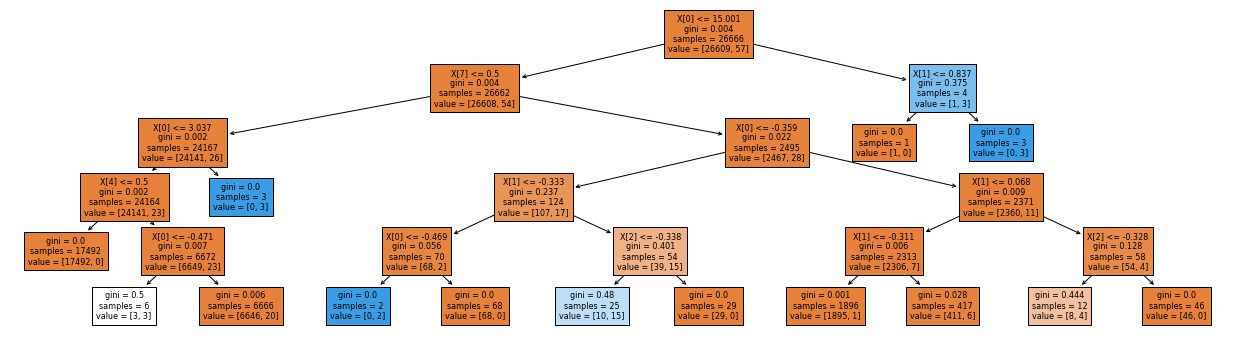

In [67]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

classes = ["isFraud", "Honest"]

model = Pipeline([
    ("preproc", preproc),
    ("decisionTree", DecisionTreeClassifier(max_depth=5,random_state=43))
])

model.fit(X_train, y_train)
print_eval_classify(x_val, y_val, model, classes)

plt.figure(figsize=(22, 6))
plot_tree(model.named_steps["decisionTree"], max_depth=5, filled=True, fontsize=8);

### 4.3.2 - Logistic Loss

In [68]:
from sklearn.linear_model import LogisticRegression

model_RegLos = Pipeline([
    ("preproc", preproc),
    ("RegLoss", LogisticRegression(solver="saga", random_state=11,class_weight={1:45}))
])

model_RegLos.fit(X_train, y_train)

print_eval_classify(x_val, y_val, model, classes)

C:\Users\Federico\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Confusion Matrix : 
              isFraud     Honest 
   isFraud      13291          6 
    Honest         28          9 

PRECISION  :       0.6000
RECALL     :       0.2432
F1-MEASURE :       0.6724


C:\Users\Federico\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


### 4.3.3 XGBClassifier

In [69]:
from xgboost import XGBClassifier 

xgbm_c = XGBClassifier(objective='reg:squarederror', 
                    learning_rate = 0.01577, 
                    reg_lambda=0.008, 
                    reg_alpha=0.0001, 
                    n_estimators=1025, 
                    verbose_eval=False)
model = Pipeline([
    ("preproc", preproc),
    ("XGBClassifier", xgbm_c)
])
model.fit(X_train, y_train)

print_eval_classify(x_val, y_val, model, classes)

C:\Users\Federico\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Federico\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[22:19:11] WARNING: ..\src\learner.cc:576: 
Parameters: { "verbose_eval" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Confusion Matrix : 
              isFraud     Honest 
   isFraud      13292          5 
    Honest         25         12 

PRECISION  :       0.7059
RECALL     :       0.3243
F1-MEASURE :       0.7217


### 4.3.4 Support Vector Machines (SVM)

In [70]:
from sklearn.svm import SVC

model_svm = Pipeline([
    ("preproc", preproc),
    ("SVM", SVC(kernel='rbf',random_state=42))
])

model_svm.fit(X_train, y_train)

print_eval_classify(x_val, y_val, model, classes)

C:\Users\Federico\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Confusion Matrix : 
              isFraud     Honest 
   isFraud      13292          5 
    Honest         25         12 

PRECISION  :       0.7059
RECALL     :       0.3243
F1-MEASURE :       0.7217


## 4.4 - Neural Network

In [73]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

X_nn = transactions[["type","amount","oldbalanceOrg","newbalanceOrig"]]
y_nn = transactions[["isFraud"]]
X_train_nn, x_val_nn, y_train_nn, y_val_nn = train_test_split(X_nn, y_nn, test_size=1/3, random_state=42)

X_scaler = ColumnTransformer([
        ("numeric",StandardScaler(),["amount", "oldbalanceOrg", "newbalanceOrig"]),
        ("categorical",OneHotEncoder(),["type"])
    ],remainder="drop")

Y_scaler = StandardScaler()

X_train_nn = X_scaler.fit_transform(X_train)
x_val_nn = X_scaler.transform(x_val)
y_train_nn = Y_scaler.fit_transform(y_train)
y_val_nn = Y_scaler.transform(y_val.values)

model_nn = Sequential([
    Dense(8, activation="relu", input_dim=8),
    Dense(1)
])
model_nn.summary()
model_nn.compile(optimizer="adam",loss="mean_squared_error")
fit_history = model_nn.fit(X_train_nn, y_train_nn, batch_size=10, epochs=15)
print_eval_base(x_val_nn, y_val_nn, model_nn)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 72        
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
2667/2667 [==============================] - 3s 1ms/step - loss: 1.0678
Epoch 2/15
2667/2667 [==============================] - 3s 1ms/step - loss: 0.9984
Epoch 3/15
2667/2667 [==============================] - 3s 1ms/step - loss: 0.9909
Epoch 4/15
2667/2667 [==============================] - 3s 1ms/step - loss: 0.9789
Epoch 5/15
2667/2667 [==============================] - 3s 1ms/step - loss: 0.9695
Epoch 6/15
2667/2667 [===================

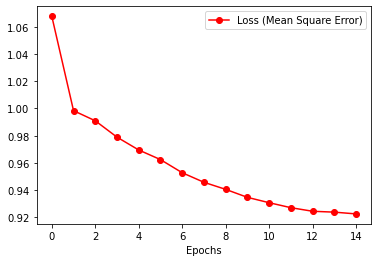

In [74]:
plt.plot(fit_history.history["loss"], "ro-")
plt.legend(["Loss (Mean Square Error)"])
plt.xlabel("Epochs");

In [75]:
def build_nn(nodes, inpDim):
    model = Sequential([
        Dense(nodes, activation="relu", input_dim=inpDim),
        Dense(256, activation="softmax"),
        Dense(128, activation="relu"),
        Dense(64, activation="relu"),
        Dense(1)
    ])
    model.compile(optimizer="adam", loss="mean_squared_error")
    model.summary()
    return model

In [76]:
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

model_nn = Pipeline([
    ("preproc", preproc),
    ("NN", KerasRegressor(build_fn=build_nn, nodes=512, inpDim=8, epochs=20, batch_size=1000))
])
model_nn.fit(X_train, y_train)
print_eval_base(x_val, y_val, model_nn)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 512)               4608      
                                                                 
 dense_3 (Dense)             (None, 256)               131328    
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 177,153
Trainable params: 177,153
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20


C:\Users\Federico\AppData\Local\Temp/ipykernel_296/1185641780.py:6: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ("NN", KerasRegressor(build_fn=build_nn, nodes=512, inpDim=8, epochs=20, batch_size=1000))


27/27 [==============================] - 1s 8ms/step - loss: 0.0021
Epoch 2/20
27/27 [==============================] - 0s 8ms/step - loss: 0.0021
Epoch 3/20
27/27 [==============================] - 0s 7ms/step - loss: 0.0021
Epoch 4/20
27/27 [==============================] - 0s 8ms/step - loss: 0.0021
Epoch 5/20
27/27 [==============================] - 0s 7ms/step - loss: 0.0021
Epoch 6/20
27/27 [==============================] - 0s 8ms/step - loss: 0.0021
Epoch 7/20
27/27 [==============================] - 0s 8ms/step - loss: 0.0020
Epoch 8/20
27/27 [==============================] - 0s 8ms/step - loss: 0.0020
Epoch 9/20
27/27 [==============================] - 0s 7ms/step - loss: 0.0020
Epoch 10/20
27/27 [==============================] - 0s 7ms/step - loss: 0.0020
Epoch 11/20
27/27 [==============================] - 0s 8ms/step - loss: 0.0020
Epoch 12/20
27/27 [==============================] - 0s 8ms/step - loss: 0.0019
Epoch 13/20
27/27 [==============================] - 0s 7ms/

## 5 - Tuning degli Iperparametri

## 6 - Conclusioni 

In [77]:
def bernoulli_process() :
    return None

## 7- Link alle risorse
#### Link al dataset di kaggle
https://www.kaggle.com/datasets/rupakroy/online-payments-fraud-detection-dataset